# No show at Doctor's appointment Analysis

## Dataset using in this project is imported from Kaggle, containing more than 110k of medical appointments. 

This dataset contains 14 unique variables: "PatientID", "AppointmentID", "Gender", "ScheduledDay", "AppointmentDay", "Age", "Neighbourhood", "Scholarship", "Hipertension", "Diabetes", "Alcoholism", "Handicap", "SMS_received" , and "No-show"

No-show variable will be used as dependent value, also as "Predicting variable", while the rest will be independent variables

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Getting data into Dataframes

In [2]:
df = pd.read_csv("med_appointment.csv")
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [3]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# Check null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
# convert ScheduledDay, AppointmentDay into datetime
df["ScheduledDay"] = df['ScheduledDay'].apply(pd.to_datetime)
df["AppointmentDay"] = df["AppointmentDay"].apply(pd.to_datetime)

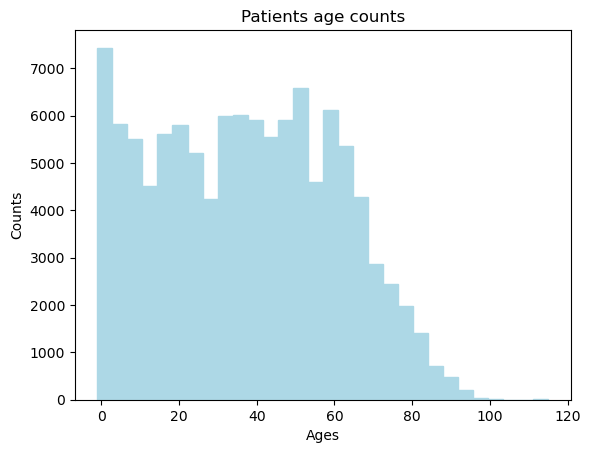

In [7]:
# Create histogram
plt.hist(df['Age'], bins = 30, color = '#ADD8E6', edgecolor = '#ADD8E6')

# Add a title and labels
plt.title('Patients age counts')
plt.xlabel('Ages')
plt.ylabel('Counts')

# Show the plot
plt.show()

In [8]:
df[df['Age'] <= 0].shape[0]

3540

## Data Cleaning and Preprocessing

### Assume that age less than 0 and More than 100 are outliers

In [9]:
df = df.drop(df[(df['Age'] <= 0) | (df['Age'] >= 100)].index)
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [10]:
# Create new "Day-waited" column
df['Day-waited'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days+1
df['dates'] = df['ScheduledDay'].dt.strftime('%d-%m-%Y')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Day-waited,dates
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,29-04-2016
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,29-04-2016
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,29-04-2016
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,29-04-2016
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,29-04-2016


In [11]:
# Check outliers
df[df['Day-waited'] < 0]['Day-waited'].value_counts()

-1    4
-6    1
Name: Day-waited, dtype: int64

In [12]:
# Fix outliers: Day-waited < 0 becomes 0
df['Day-waited'] = df['Day-waited'].apply(lambda x: 0 if x < 0 else x)
df['Day-waited'].value_counts(ascending = True).sort_index()

0      37157
1       5026
2       6635
3       2637
4       5212
       ...  
155       10
162       11
169        8
176       16
179       10
Name: Day-waited, Length: 129, dtype: int64

In [13]:
# Change No-show column into binary
df['No-show'] = df['No-show'].replace({'No': 0, 'Yes': 1})

In [14]:
did_not_show = str(df[df['No-show'] == 1].shape[0])
print ("There are " + did_not_show + " people that did not show up for the appointment")
print ("Count as " + "{:.2f}".format(int(did_not_show) / int(df['No-show'].count()) * 100) + "%")

There are 21677 people that did not show up for the appointment
Count as 20.26%


# Data analysis and Visualization

## Does waiting time affect appointment?

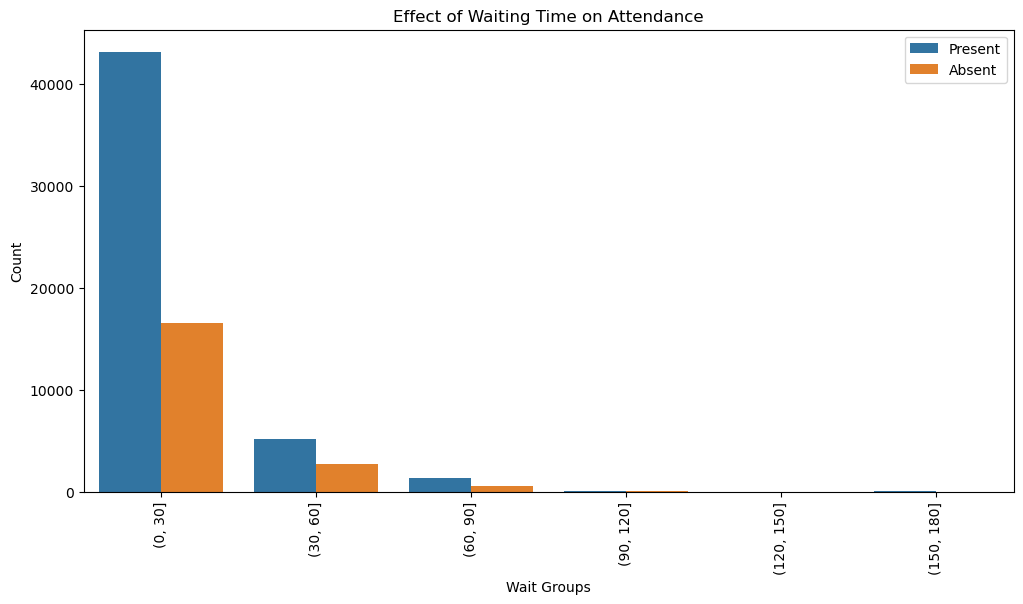

In [15]:
# Create groups based on the waiting time column
bins = [0, 30, 60, 90, 120, 150, 180]
df['Wait_Groups'] = pd.cut(df['Day-waited'], bins=bins)

plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
sns.countplot(x='Wait_Groups', hue='No-show', data=df)
plt.title('Effect of Waiting Time on Attendance')
plt.xlabel('Wait Groups')
plt.ylabel('Count')
plt.legend(['Present', 'Absent'])
plt.show()

In [36]:
no_show_pivot = pd.pivot_table(df, index='Wait_Groups', columns='No-show', aggfunc='size', fill_value=0)
no_show_pivot

No-show,0,1
Wait_Groups,,
"(0, 30]",43207,16617
"(30, 60]",5215,2736
"(60, 90]",1309,523
"(90, 120]",101,26
"(120, 150]",18,11
"(150, 180]",38,18


In [59]:
for i in range(6):
    print (f"For the waiting time of the interval ({i*30}, {(i*30)+30}], the absent percentage is {no_show_pivot[1].iloc[i]*100/(no_show_pivot[0].iloc[i]+no_show_pivot[1].iloc[i]):.2f} %")

For the waiting time of the interval (0, 30], the absent percentage is 27.78 %
For the waiting time of the interval (30, 60], the absent percentage is 34.41 %
For the waiting time of the interval (60, 90], the absent percentage is 28.55 %
For the waiting time of the interval (90, 120], the absent percentage is 20.47 %
For the waiting time of the interval (120, 150], the absent percentage is 37.93 %
For the waiting time of the interval (150, 180], the absent percentage is 32.14 %


<div class="alert alert-block alert-success">
    <p>The waiting time for appointment slightly affect the appointment show-up</p>
</div>

### Seperate Male and Female DataFrames

In [17]:
df_male = df[df['Gender'] == "M"]
df_female = df[df['Gender'] == "F"]

## Do genders affect patients' attendace?

In [18]:
# Calculate No-show for female dataset

male_did_not_show = str(df_male[df_male['No-show'] == 1].shape[0])
print ("There are " + male_did_not_show + " people that did not show up for the appointment")
print ("Count as " + "{:.2f}".format(int(male_did_not_show) / int(df_male['No-show'].count()) * 100) + "%")

There are 7405 people that did not show up for the appointment
Count as 20.09%


In [19]:
# Calculate No-show for female dataset

female_did_not_show = str(df_female[df_female['No-show'] == 1].shape[0])
print ("There are " + female_did_not_show + " people that did not show up for the appointment")
print ("Count as " + "{:.2f}".format(int(female_did_not_show) / int(df_female['No-show'].count()) * 100) + "%")

There are 14272 people that did not show up for the appointment
Count as 20.36%


### The answer is No.

<p style="color:black;font-size:15.5px;">
    The number of missing attendace of male and female datasets are around the same, which is 20.09% and 20.36% respectively.
    Compared to overall attendace, we can conclude that the genders do not relevant to any patients' attendance
</p>


<strong>____________________________________________________________________________________________________________________________</strong>

# Observe the male dataset

In [20]:
df_male.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Day-waited,dates,Wait_Groups
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,29-04-2016,NaN
11,7.542951e+12,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,1,3,26-04-2016,"(0.0, 30.0]"
13,9.113946e+14,5636249,M,2016-04-28 14:52:07+00:00,2016-04-29 00:00:00+00:00,28,NOVA PALESTINA,0,0,0,0,0,0,0,1,28-04-2016,"(0.0, 30.0]"
16,8.457439e+13,5633121,M,2016-04-28 08:51:47+00:00,2016-04-29 00:00:00+00:00,50,NOVA PALESTINA,0,0,0,0,0,0,0,1,28-04-2016,"(0.0, 30.0]"
22,8.632298e+14,5616091,M,2016-04-25 13:29:16+00:00,2016-04-29 00:00:00+00:00,13,CONQUISTA,0,0,0,0,0,1,1,4,25-04-2016,"(0.0, 30.0]"


In [21]:
df_male.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Day-waited
count,3.686700e+04,3.686700e+04,36867.000000,36867.000000,36867.000000,36867.000000,36867.000000,36867.000000,36867.000000,36867.000000,36867.000000
mean,1.509721e+14,5.677455e+06,35.396913,0.053788,0.175279,0.063390,0.057965,0.028562,0.293704,0.200857,9.525131
std,2.587948e+14,6.986982e+04,23.820892,0.225602,0.380210,0.243666,0.233681,0.185087,0.455464,0.400647,14.778430
min,4.374176e+04,5.122866e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.361356e+12,5.642718e+06,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.353478e+13,5.682292e+06,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,9.494699e+13,5.726706e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,14.000000
max,9.999465e+14,5.790466e+06,98.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,179.000000


# Data modeling

In [24]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split

Xm = df_male.drop(["PatientId", "AppointmentID", "Gender", 
                   "ScheduledDay", "AppointmentDay", "Neighbourhood", 
                   "No-show", "dates", "Wait_Groups"], 
                  axis = 1)
ym = df_male["No-show"]

Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size = 0.2, random_state = 42)

clf = HistGradientBoostingClassifier(max_iter=100).fit(Xm_train, ym_train)
clf.score(Xm_test, ym_test)

0.8029563330621101

In [25]:
# Create plotting function for k models

def plot_k_neighbors(k_scores):
    # Create figure and axes
    fig, ax = plt.subplots(figsize=(15,6))

    # Define the values
    x_vals = list(range(3,60,3))
    y_vals = list(k_scores.values())

    # Create the line plot
    ax.plot(x_vals, y_vals, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

    # Set up grid for easier visualization
    ax.grid(True, linestyle='-.')
    ax.tick_params(labelcolor='r', labelsize='medium', width=3)

    # Title and labels with font enhancements
    plt.title('Score vs. K Value', fontweight='bold', fontsize=16, color='black')
    plt.xlabel('K', fontweight='bold', fontsize=14, color='black')
    plt.ylabel('Score', fontweight='bold', fontsize=14, color='black')

    # Add a legend
    plt.legend(['Scores'], loc='upper right', fontsize='large')

    # Display the plot
    plt.show()

When the n_neighbor = 3, the model score is: 0.7561703281800922
When the n_neighbor = 6, the model score is: 0.7921074043938161
When the n_neighbor = 9, the model score is: 0.7861404936262544
When the n_neighbor = 12, the model score is: 0.7964469758611337
When the n_neighbor = 15, the model score is: 0.7921074043938161
When the n_neighbor = 18, the model score is: 0.7995660428532683
When the n_neighbor = 21, the model score is: 0.7969894222945484
When the n_neighbor = 24, the model score is: 0.8011933821535123
When the n_neighbor = 27, the model score is: 0.800108489286683
When the n_neighbor = 30, the model score is: 0.8016002169785734
When the n_neighbor = 33, the model score is: 0.7994304312449145
When the n_neighbor = 36, the model score is: 0.7999728776783293
When the n_neighbor = 39, the model score is: 0.8002441008950366
When the n_neighbor = 42, the model score is: 0.7997016544616219
When the n_neighbor = 45, the model score is: 0.7998372660699756
When the n_neighbor = 48, the

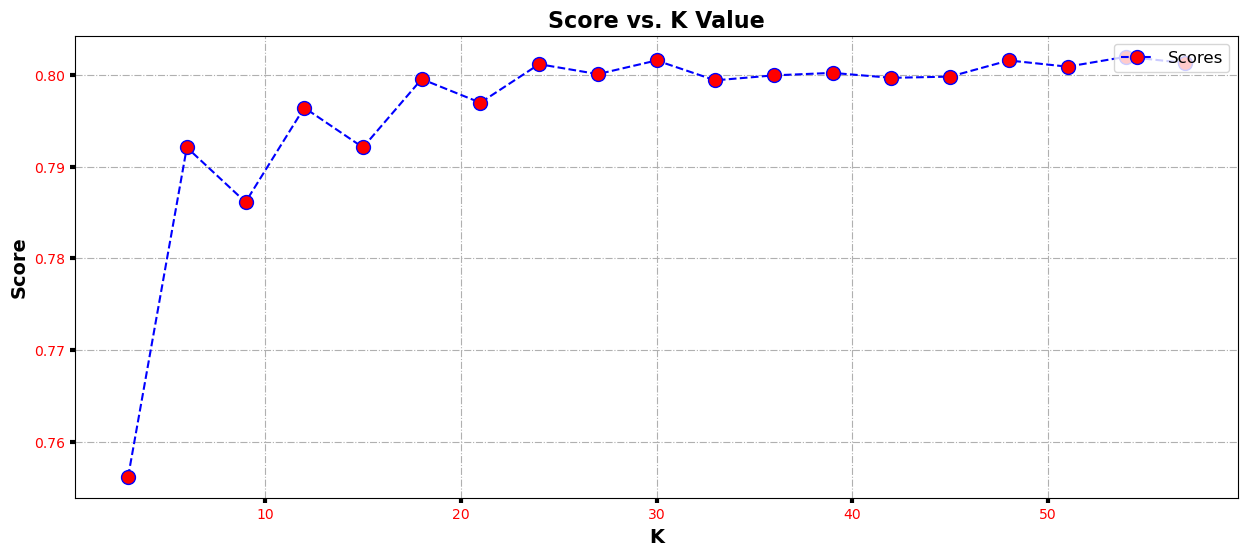

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create loop testing each n for best model scores

men_scores = {}

for neighbor in range(3,60,3):
    knn = KNeighborsClassifier(n_neighbors = neighbor)  # Initialize the model
    
    knn.fit(Xm_train, ym_train)  # Train the model
    # ym_pred = knn.predict(Xm_test)  # Predict for test data
    
    men_loop_score = knn.score(Xm_test, ym_test)  # Obtain model score
    men_scores[neighbor] = men_loop_score
    
    print (f"When the n_neighbor = {neighbor}, the model score is: {knn.score(Xm_test, ym_test)}")

# Print the best score
best_men_k_score = max(men_scores.values())
best_neighbor = max(men_scores, key=men_scores.get)
print(f"\nThe best score of the K-model is {best_men_k_score} with n_neighbor = {best_neighbor}")

plot_k_neighbors(men_scores)

## First models summary: Finding the best model


As we can see the HistGradientBoostingClassifier ensemble model and K-nearest neighbours have around the same model score at approximately 0.805, which is decent but not the best.


# The next task is to find the better model for this dataset.

### If needed, use the pip install for the confusion matrix

!pip install plot_confusion_matrix

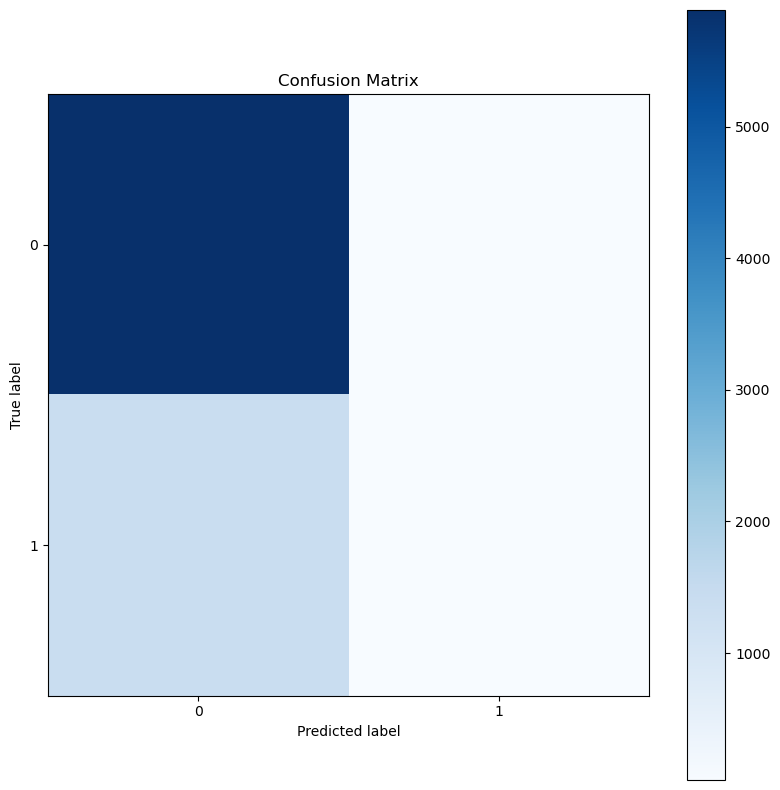

In [27]:
# predict the test data
ym_pred = clf.predict(Xm_test)

# Compute confusion matrix
cm = confusion_matrix(ym_test, ym_pred)

# Show confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()

# Display the labels
target_names = ['0', '1']
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names)
plt.yticks(tick_marks, target_names)

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Try Kernel Approximation Method

### We will use the Nystroem method

    "The Nystroem method, as implemented in Nystroem is a general method for low-rank approximations of kernels. It achieves this by essentially subsampling the data on which the kernel is evaluated. By default Nystroem uses the rbf kernel, but it can use any kernel function or a precomputed kernel matrix. The number of samples used - which is also the dimensionality of the features computed - is given by the parameter n_components"
    
    -- sklearn

In [28]:
from sklearn.kernel_approximation import RBFSampler, Nystroem
from sklearn.linear_model import SGDClassifier

# Make a pipeline model with kernel approximation and SGD classifier,
# RBFSampler and an SGDClassifier

rbf_feature = RBFSampler(gamma=1, random_state=42)
X_features = rbf_feature.fit_transform(Xm_train)
clf_SGD = SGDClassifier(max_iter=100, tol=1e-3)
clf_SGD.fit(X_features, ym_train)

# Test on transformed Xm_test
X_test_features = rbf_feature.transform(Xm_test)
ym_pred_SGD = clf_SGD.predict(X_test_features)

# Use zero_division parameter to control this behavior
print(classification_report(ym_test, ym_pred, zero_division=1))
# Checking performance our model with confusion matrix.
print(confusion_matrix(ym_test, ym_pred_SGD))

# Checking performance our model with classification report.
print(classification_report(ym_test, ym_pred_SGD))

# Print the score of the fitted model
SGD_score = clf_SGD.score(X_test_features, ym_test)
print(f"The score of the model is: {SGD_score}")

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      5933
           1       0.43      0.02      0.05      1441

    accuracy                           0.80      7374
   macro avg       0.62      0.51      0.47      7374
weighted avg       0.73      0.80      0.73      7374

[[5933    0]
 [1441    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      5933
           1       0.00      0.00      0.00      1441

    accuracy                           0.80      7374
   macro avg       0.40      0.50      0.45      7374
weighted avg       0.65      0.80      0.72      7374

The score of the model is: 0.8045836723623542


C:\Users\Theephop\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Theephop\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Theephop\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### The best score for this model is still around 0.804, which is not ideal

Therefore, using ensemble or the n-neighbor model might be the best case.

# Making the same procedures with Female dataset

In [29]:
df_female.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Day-waited,dates,Wait_Groups
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,29-04-2016,NaN
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,29-04-2016,NaN
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,29-04-2016,NaN
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,29-04-2016,NaN
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,0,2,27-04-2016,"(0.0, 30.0]"


In [30]:
df_female.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Day-waited
count,7.010900e+04,7.010900e+04,70109.000000,70109.000000,70109.000000,70109.000000,70109.000000,70109.000000,70109.000000,70109.000000,70109.000000
mean,1.453362e+14,5.674367e+06,39.840334,0.125890,0.218774,0.079961,0.017444,0.019955,0.338830,0.203569,10.504358
std,2.542191e+14,7.206946e+04,21.547338,0.331727,0.413418,0.271235,0.130921,0.151592,0.473315,0.402655,15.502251
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.966435e+12,5.639326e+06,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.975754e+13,5.679972e+06,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.374187e+13,5.724898e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000
max,9.999816e+14,5.790484e+06,99.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,179.000000


In [31]:
# Calculate No-show for female dataset

female_did_not_show = str(df_female[df_female['No-show'] == 1].shape[0])
print ("There are " + female_did_not_show + " people that did not show up for the appointment")
print ("Count as " + "{:.2f}".format(int(female_did_not_show) / int(df_female['No-show'].count()) * 100) + "%")

There are 14272 people that did not show up for the appointment
Count as 20.36%


In [32]:
# Use train test split

Xfm = df_female.drop(["PatientId", "AppointmentID", "Gender", 
                   "ScheduledDay", "AppointmentDay", "Neighbourhood", 
                   "No-show", "dates", "Wait_Groups"], 
                  axis = 1)
yfm = df_female["No-show"]

Xfm_train, Xfm_test, yfm_train, yfm_test = train_test_split(Xfm, yfm, test_size = 0.2, random_state = 42)

When the n_neighbor = 3, the model score is: 0.7500356582513193
When the n_neighbor = 6, the model score is: 0.7792041078305519
When the n_neighbor = 9, the model score is: 0.7744259021537584
When the n_neighbor = 12, the model score is: 0.7829838824704036
When the n_neighbor = 15, the model score is: 0.7824846669519326
When the n_neighbor = 18, the model score is: 0.787334189131365
When the n_neighbor = 21, the model score is: 0.7869062901155327
When the n_neighbor = 24, the model score is: 0.7889744686920553
When the n_neighbor = 27, the model score is: 0.7875481386392811
When the n_neighbor = 30, the model score is: 0.7896876337184424
When the n_neighbor = 33, the model score is: 0.7894023677078876
When the n_neighbor = 36, the model score is: 0.7901155327342747
When the n_neighbor = 39, the model score is: 0.790543431750107
When the n_neighbor = 42, the model score is: 0.7913992297817715
When the n_neighbor = 45, the model score is: 0.791042647268578
When the n_neighbor = 48, the m

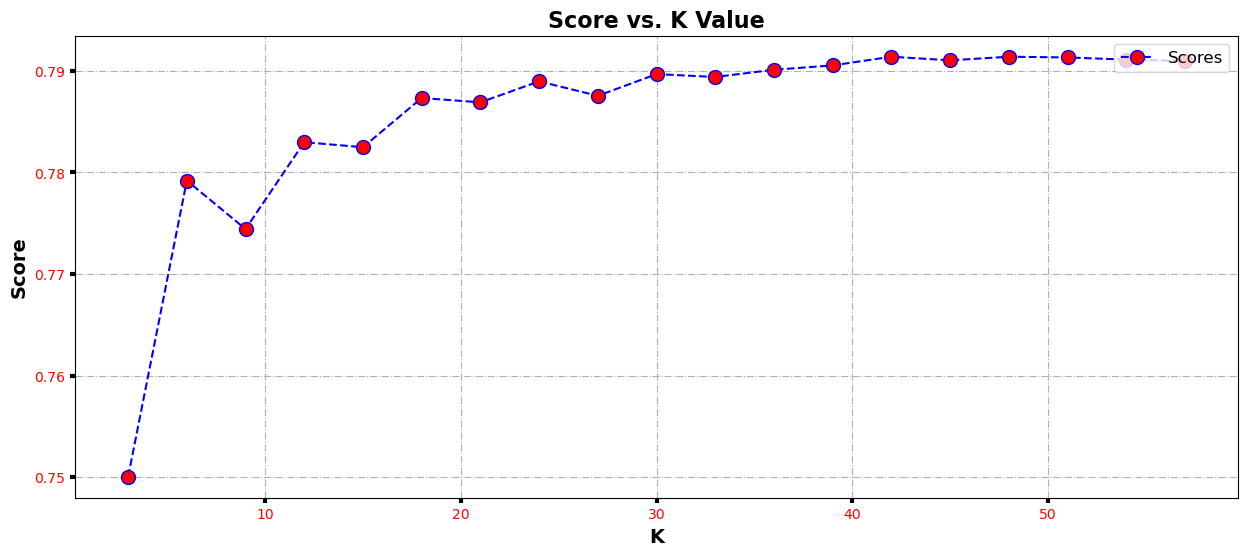

In [33]:
# Create loop testing each n for best model scores

female_scores = {}

for neighbor in range(3,60,3):
    knn = KNeighborsClassifier(n_neighbors = neighbor)  # Initialize the model
    
    knn.fit(Xfm_train, yfm_train)  # Train the model
    # ym_pred = knn.predict(Xm_test)  # Predict for test data
    
    female_loop_score = knn.score(Xfm_test, yfm_test)  # Obtain model score
    female_scores[neighbor] = female_loop_score
    
    print (f"When the n_neighbor = {neighbor}, the model score is: {knn.score(Xfm_test, yfm_test)}")

# Print the best score
best_female_k_score = max(female_scores.values())
best_female_neighbor = max(female_scores, key=female_scores.get)
print(f"\nThe best score of the K-model is {best_female_k_score} with n_neighbor = {best_female_neighbor}")

plot_k_neighbors(female_scores)

<div class="alert alert-block alert-success"> 
    <strong>Summary for female dataset</strong>

<p>The scores for female dataset are slightly lower

# Summary for the Medical Appointment Dataset

<div style ="font-size:15.5px">
    In this project, we leveraged <strong>machine learning</strong> techniques to <strong>predict the "No-show" outcome</strong> in a medical appointments dataset. We aimed to predict whether a patient would show up for their medical appointment based on the features in the dataset.
</div>

> 1. We initially started with a <strong><em>K-Nearest Neighbors (KNN)</em></strong> model. The KNN algorithm is simple and effective, suitable for smaller datasets. We tuned the model by trying out different values for 'K', ranging from 3 to 60, and then visually analysing the scores. The most significant insight we gained from this analysis was the ideal number of neighbours that provided the highest accuracy for our model.

> 2. After the KNN model, we implemented the <strong><em>SGDClassifier</em></strong> with kernel approximation, specifically utilizing the Radial Basis Function (RBF) sampler. Kernel approximation allows us to use kernelized SVMs, which offers substantial improvements in computational efficiency and lower memory usage as compared to standard SVMs. These models, when partnered with the SGDClassifier, can process larger datasets and work faster on binary classification problems.

<p>We further used our trained model to make predictions on unseen data, demonstrating a practical application of the model. The model could then be leveraged to drive strategies aimed at improving patient turnout for medical appointments.</p>

<p>Challenges encountered during this project underscored the significance of preprocessing steps, feature selection, model selection and hyperparameter tuning to the overall success of a machine learning project. The insights gained from this project provide a useful foundation from which to further explore and benefit from machine learning in healthcare, including scaling, encoding etc.</p>